<a href="https://colab.research.google.com/github/JodhiKrisantus/Rakamin-Project/blob/main/Pandas_Lovers_Holiday_Package_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project: Holiday Package Prediction**
Pandas Lovers <br>
Data Science Batch 32

# **PREPARATION**

**DATASET : HOLIDAY PACKAGE PREDICTION**

**1. PROBLEM STATEMENT**

Perusahaan traveling 'Trips & Travel.Com' membuat penawaran paket liburan terbaru. Agar lebih efektif, perusahaan ingin menyelesaikan permasalahan yang ada.
- Pada tahun lalu, hanya 18% pelanggan yang membeli paket liburan yang ditawarkan.
- Revenue perusahaan tidak mengalami peningkatan yang signifikan.

**2. GOAL**

Untuk menaikkan convertion rate dan revenue perusahaan.

**3. OBJECTIVE**

Membuat model untuk memprediksi pelanggan yang akan membeli paket liburan terbaru.

**4. BUSINESS METRICS**
- Total revenue 
- convertion rate

**IMPORT LIBRARY**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import re 
import matplotlib.patches


In [32]:
import matplotlib
print(matplotlib.__version__)
print(sns.__version__)
print(pd.__version__)

3.5.2
0.11.2
1.4.4


**IMPORT DATASET**

In [33]:
df = pd.read_csv("https://raw.githubusercontent.com/JodhiKrisantus/DATASET/main/Travel.csv")
df.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# **EDA, INSIGHT & VISUALIZATION**

## **1. Descriptive Statistics**

**QUICK LOOK**

In [34]:
df.sample(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1995,201995,1,24.0,Self Enquiry,3,NaN,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,0,1,1,1.0,Manager,19577.0
2727,202727,0,56.0,Self Enquiry,1,27.0,Large Business,Male,3,4.0,Deluxe,3.0,Divorced,5.0,1,2,1,2.0,Manager,24093.0
3751,203751,0,29.0,Self Enquiry,1,7.0,Small Business,Female,4,4.0,Basic,5.0,Married,3.0,0,1,1,1.0,Executive,22269.0
2076,202076,0,34.0,Company Invited,1,22.0,Salaried,Female,3,4.0,Basic,3.0,Single,2.0,0,5,1,2.0,Executive,17553.0
3224,203224,1,29.0,Company Invited,1,31.0,Large Business,Male,4,5.0,Standard,5.0,Unmarried,3.0,0,2,0,1.0,Senior Manager,27400.0


In [35]:
#cek kesesuaian tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [36]:
#cek kolom kosong
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

**CHECK DATA DUPLIKAT dan VALUE COUNT (CATEGORICAL)**

In [37]:
print('Banyak Data : ',df.shape)
print('Jumlah Id Customer Duplikat : ',df['CustomerID'].duplicated().sum())
print('Jumlah Data Duplikat',df.duplicated().sum())

Banyak Data :  (4888, 20)
Jumlah Id Customer Duplikat :  0
Jumlah Data Duplikat 0


In [38]:
mv=df.isnull().sum()
tmv=df.isnull().count()

pmv = mv*100/tmv

mdf = pd.concat([mv,pmv], axis=1)
mdf.columns=['Missing Value Total', 'Missing Value Percentage (%)']
mdf

,Missing Value Total,Missing Value Percentage (%)
CustomerID,0,0.000000
ProdTaken,0,0.000000
Age,226,4.623568
TypeofContact,25,0.511457
CityTier,0,0.000000
DurationOfPitch,251,5.135025
Occupation,0,0.000000
Gender,0,0.000000
NumberOfPersonVisiting,0,0.000000
NumberOfFollowups,45,0.920622


<AxesSubplot:>

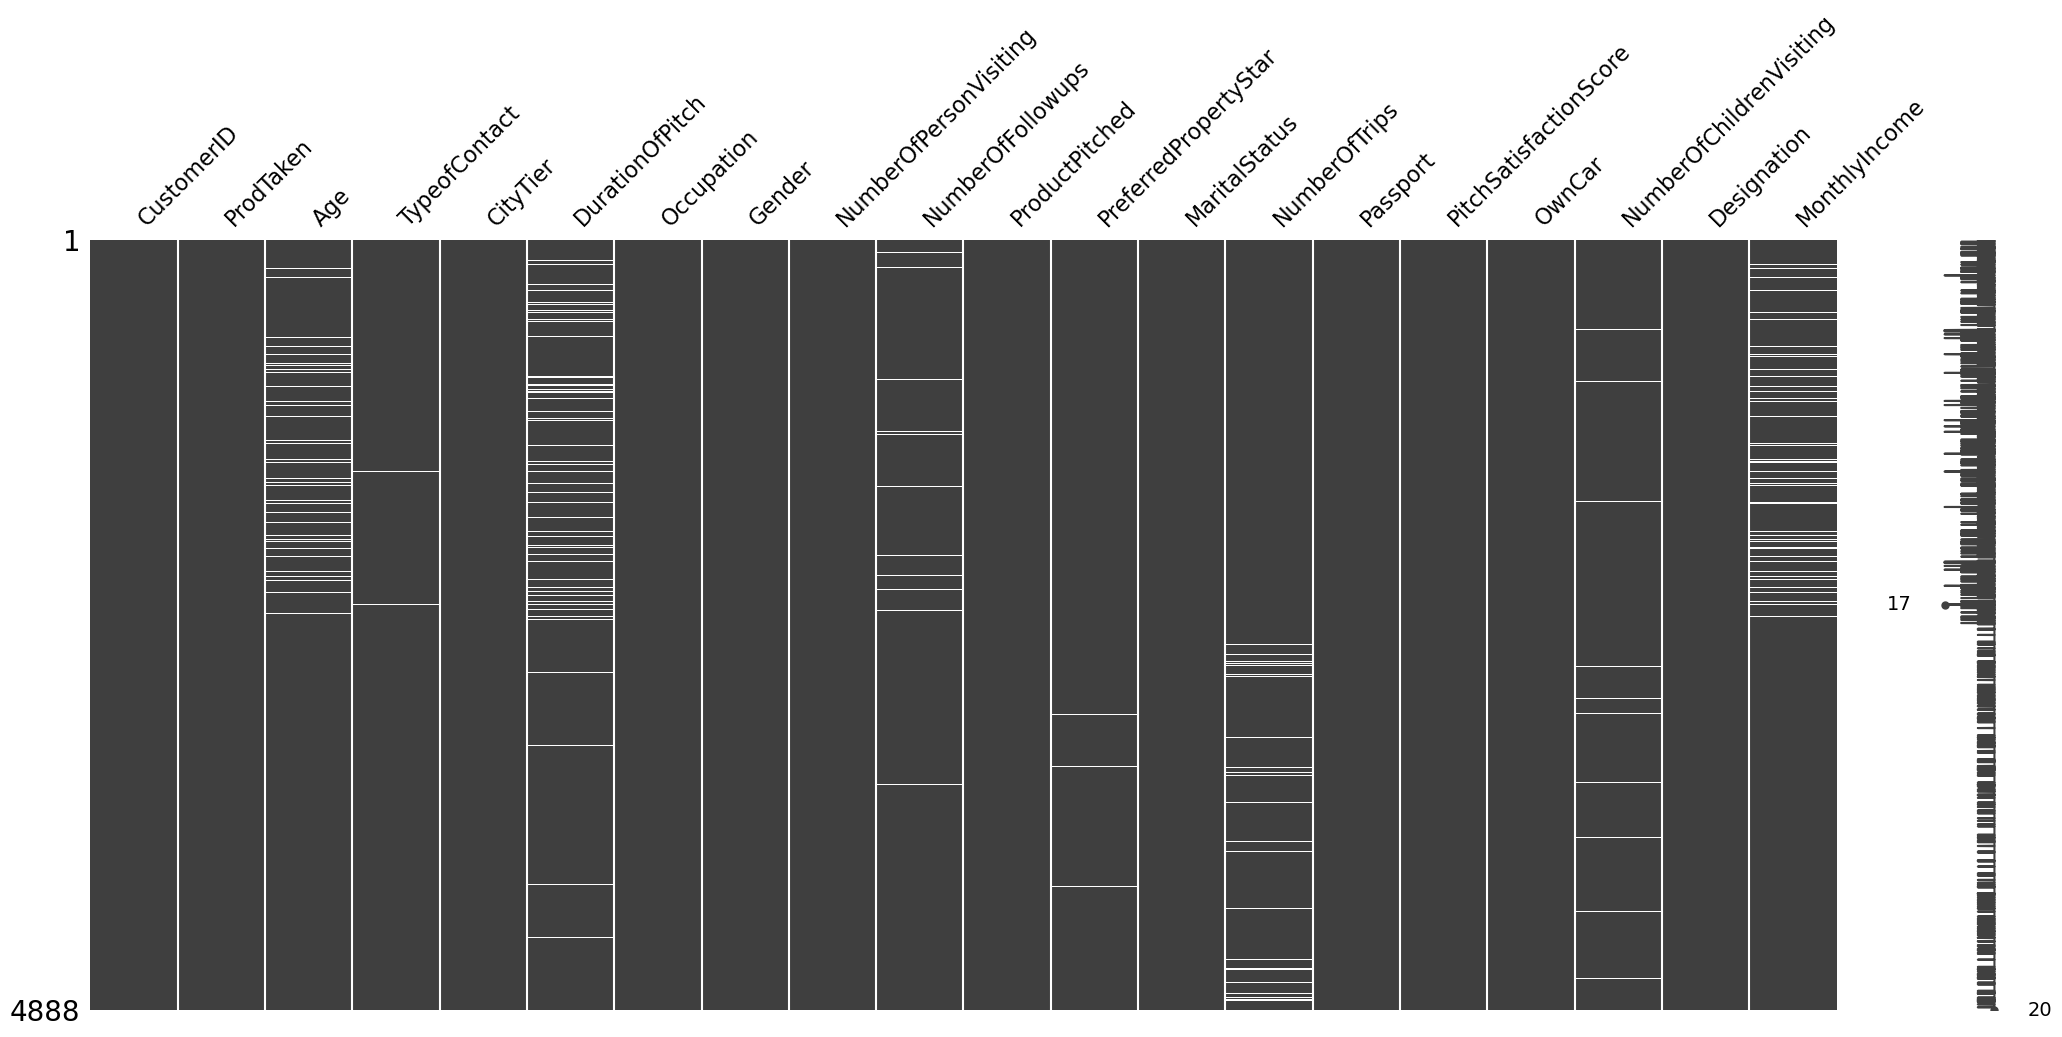

In [39]:
import missingno as msno
msno.matrix(df)

In [40]:
# pengelompokan kolom berdasarkan jenisnya
categorical = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']
num         = ['Age','DurationOfPitch','MonthlyIncome']
diskrit     = ['ProdTaken','CityTier','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar',
              'NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar', 'NumberOfChildrenVisiting']

In [41]:
#cek nilai unik pada kolom categorical
for i in categorical:
    print(df[i].value_counts(), end="\n\n")

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64



In [42]:
#cek nilai summary
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [43]:
df[diskrit].describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0
OwnCar,4888.0,0.620295,0.485363,0.0,0.0,1.0,1.0,1.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.0,1.0,2.0,3.0


In [44]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


In [45]:
df[categorical].describe().T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


**HASIL OBSERVASI**

Berdasarkan output di atas dapat disimpulkan bahwa:

- Terdapat kolom dengan tipe data yang kurang sesuai, yaitu kolom `NumberOfChildrenVisiting`,`DurationOfPitch`, `NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips` & `Age` yang bertipe data float sehingga nantinya harus kita rubah menjadi tipe data integer.

- Terdapat 9 kolom yang memiliki missing value, yaitu kolom `Age`,`TypeofContact`, `DurationOfPitch`,`NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips`, `NumberOfChildrenVisitin` & `MonthlyIncome`. Teramati 9 kolom memiliki missing value,<5.1% sehingga dapat dikatagorikan masih relatif aman.

- Pada kolom `NumberOfTrips`, terdapat nilai (max = 22) dan (min = 1 ), Sedangkan memiliki mean = 3.23 yang lebih besar dari median = 3.000. mengindikasikan data tersebar pada nilai nilai yang memiliki value yang kecil. Atau bisa disebut terdistribusi (positif skewed).

- Pada kolom `MonthlyIncome` memiliki mean yang lebih besar dibandingkan nilai mediannya, mengindikasikan sebaran data tersebut yaitu positive skewed.

- Pada kolom `MonthlyIncome` pun terlihat memiliki standard deviation yang sangat tinggi, yang mengartikan terdapat data data yang tersebar sangat jauh dari nilai rata rata, yang kemungkinan menandakan adanya outlier.

- Tidak terdapat data yang duplikasi pada dataset ini.

- Terdapat kesalahan value pada kolom `Gender` yaitu adanya value 'Fe Male', yang nantinya harus kita handle pada saat preprocessing data.

- Pada kolom `MaritalStatus`, terdapat value yang memiliki arti sama yaitu value Single & Unmarried.

## **2. Univariate Analysis**

c:\Users\jodhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\Users\jodhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is c

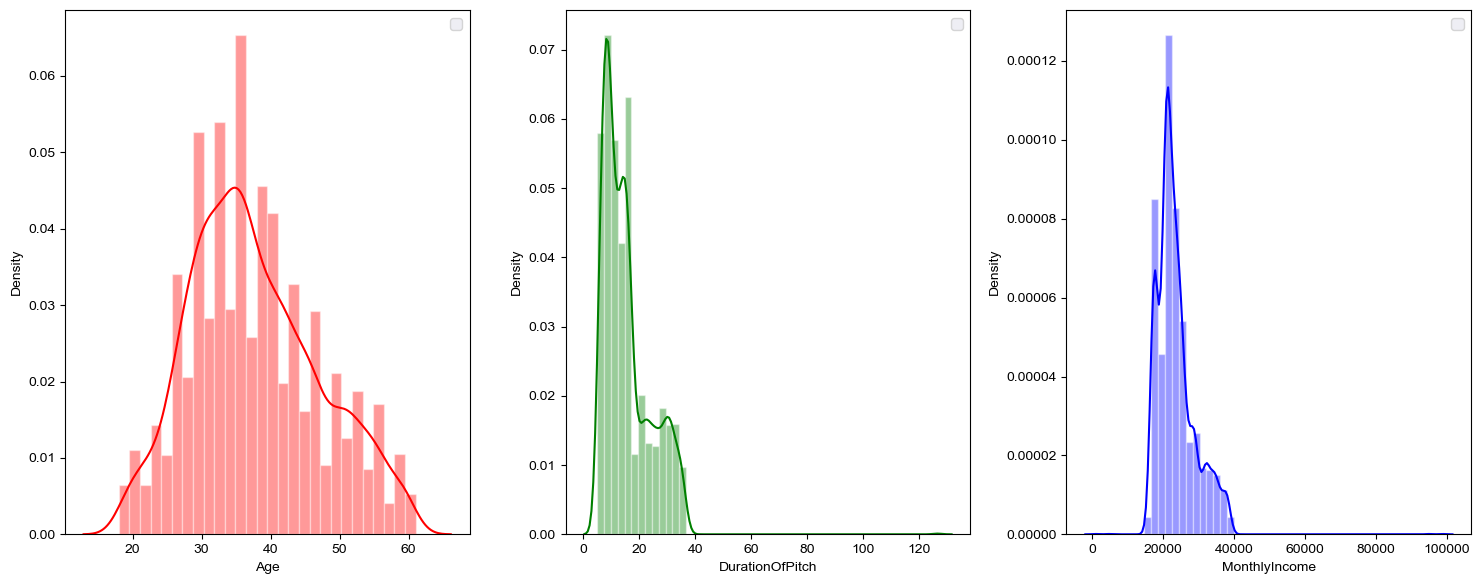

In [46]:
fig, axes = plt.subplots(1,3, figsize=(15,6))
sns.set_theme(style="darkgrid", palette="pastel")
colors = ['red', 'green', 'blue']

for i in range(len(num)):
    sns.distplot(df[num[i]], ax = axes[i], color=colors[i]) 
    axes[i].legend()

plt.tight_layout()
plt.show()

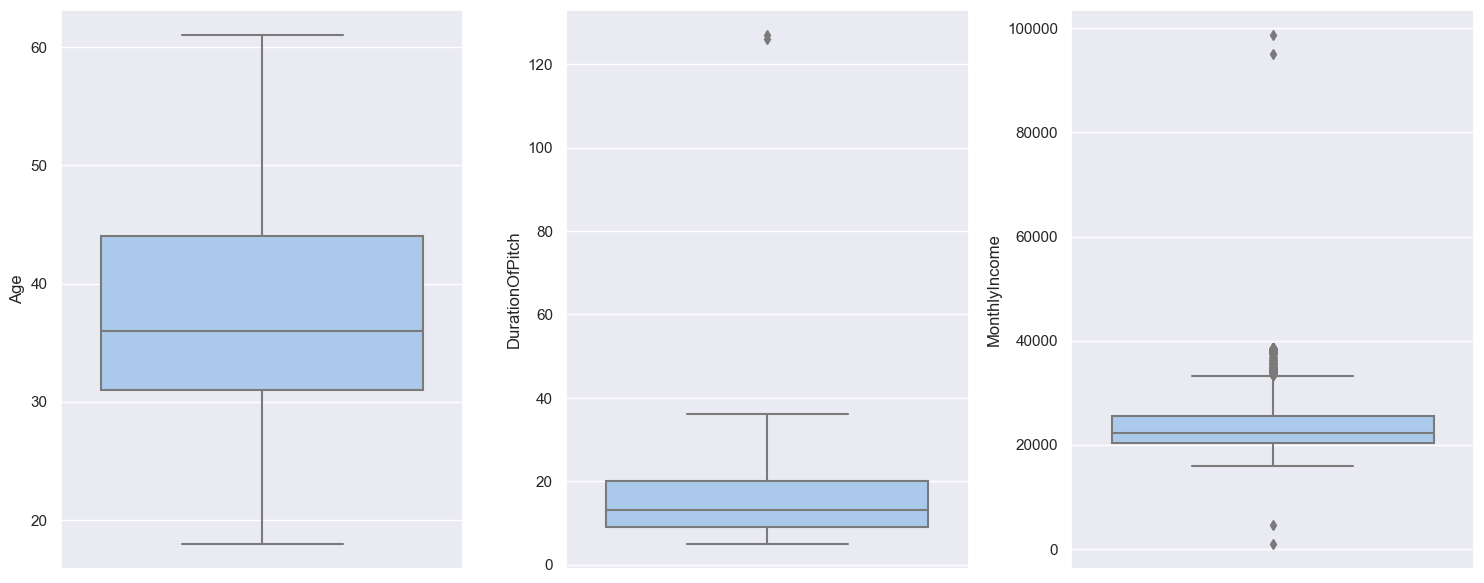

In [47]:
fig, axes = plt.subplots(1,3, figsize=(15,6))
for i in range(len(num)):
    sns.boxplot(y=num[i], ax = axes[i], data=df)
plt.tight_layout()
plt.show()

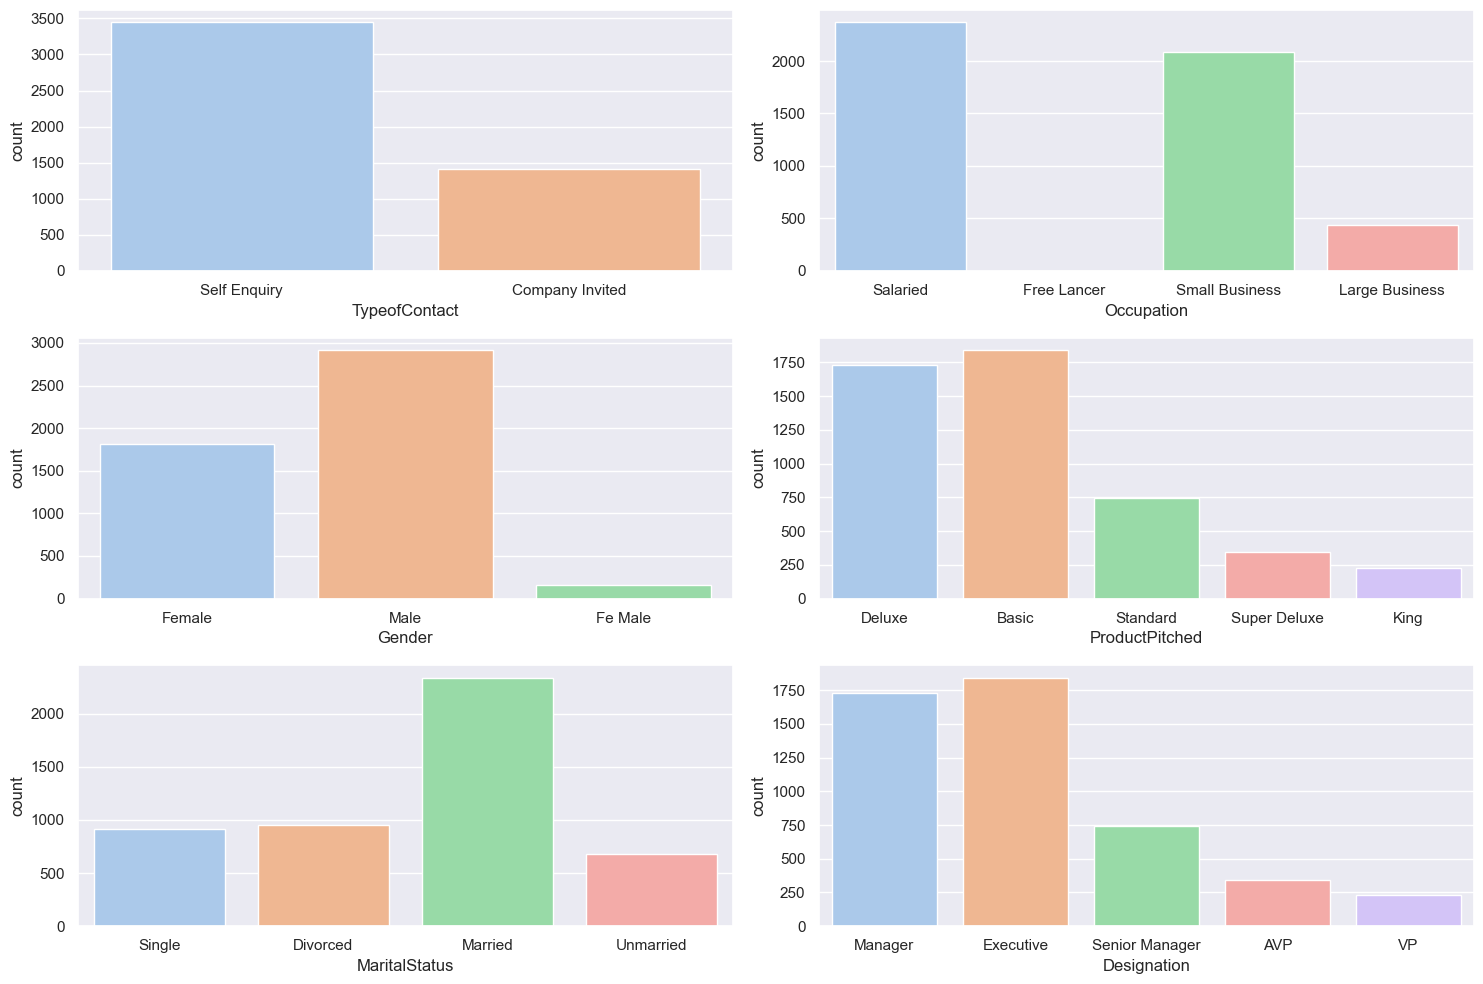

In [48]:
plt.figure(figsize=(15,10))
for i in range (len(categorical)):
    plt.subplot(3,2, i+1)
    sns.countplot(data=df, x=categorical[i])
    sns.set_theme(style="darkgrid", palette="pastel")
plt.tight_layout()

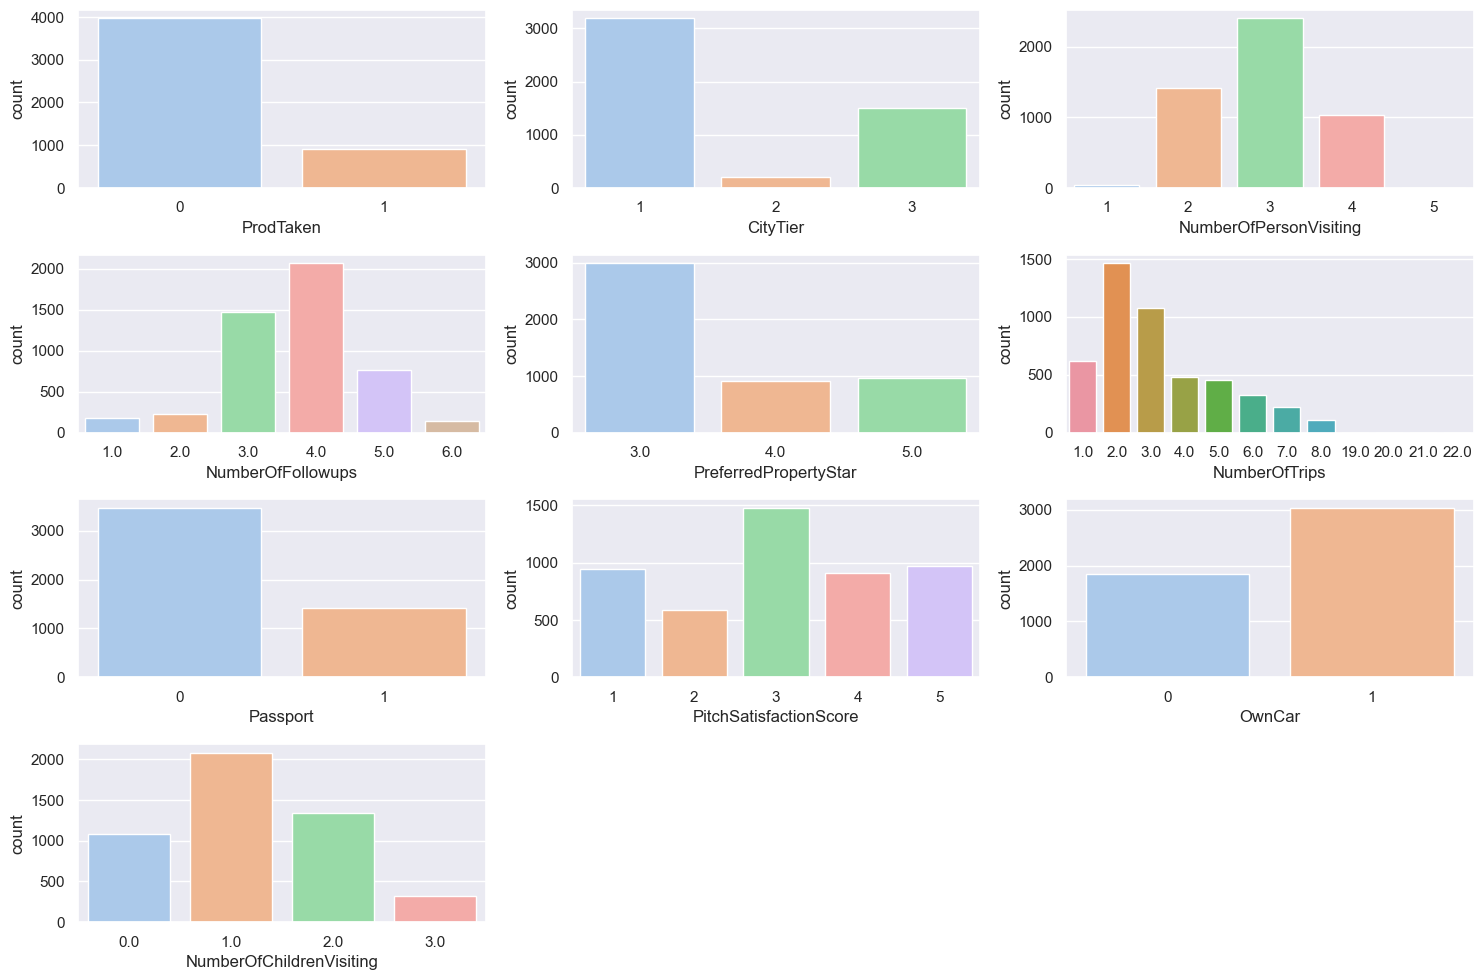

In [49]:
plt.figure(figsize=(15,10))
for i in range(len(diskrit)):
    plt.subplot(4,3, i+1)
    sns.countplot(data=df, x=diskrit[i] )
    plt.tight_layout()

**HASIL OBSERVASI**

- Pada kolom `Age` distribusi datanya hampir mendekati normal.

- Pada kolom `DurationOfPitch` terlihat distribusinya positive skewed dimana kebanyakan frekuensi data tersebar pada nilai <20. terlihat adanya outlier pada nilai > 120, sehingga nantinya akan kita ubah distribusi nya menjadi normal pada saat preprocessing data.

- Pada kolom `MonthlyIncome` data tersebar pada nilai 20k - 30k. dimana terdapat data outlier pada nilai >80k & < 10k. Dan sama seperti kolom `DurationOfPitch` nantinya akan kita ubah distribusi data nya menjadi normal pada saat melakukan preprocessing data.

- Terdapat outlier pada kolom `NumberOfTrips`, dimana adanya nilai ekstrim yang mencapai < 19. Sehingga nanti akan kita hilangkan outliernya pada saat pre-processing.

- Customer yang memiliki `Occupation` sebagai freelancer sangat sedikit (0,04%) jika dibandingkan dengan `Occupation` yang lain.

- Pada kolom target / `ProdTaken`. Terdapat class imbalance atau ketimpangan data, dimana customer yang mengambil paket liburan (ProdTaken = 1) memiliki frekuensi dibawah <1000. sedangkan customer yang tidak mengambil paket wisata (prodtaken =0 ) berjumlah sangat dominan, sekitar 4000 customer. Sehingga ketimpangan data pada target harus diproses dengan undersampling / oversampling pada saat data preprocessing nanti.

## **3. Multivariate Analysis**





<AxesSubplot:>

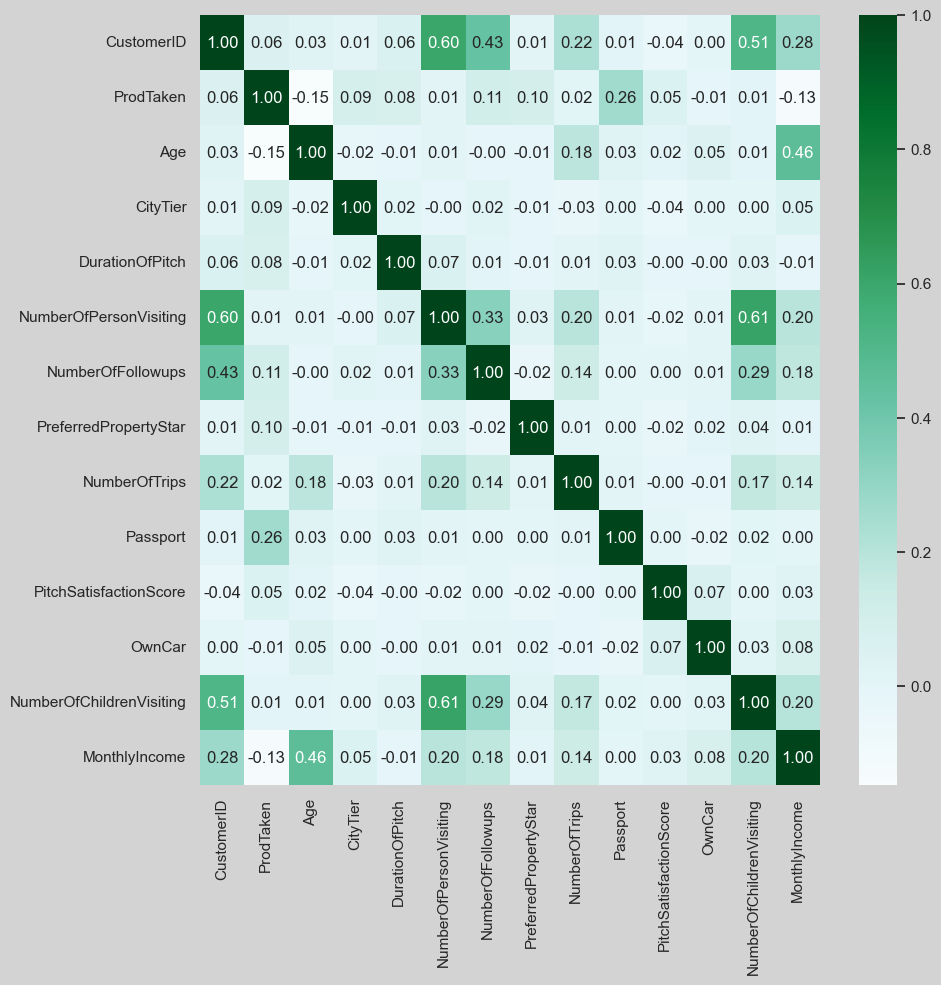

In [50]:
plt.figure(figsize=(10,10), facecolor='lightgray')
sns.heatmap(df.corr(), cmap='BuGn',annot=True, fmt='.2f')

<Figure size 2000x2000 with 0 Axes>

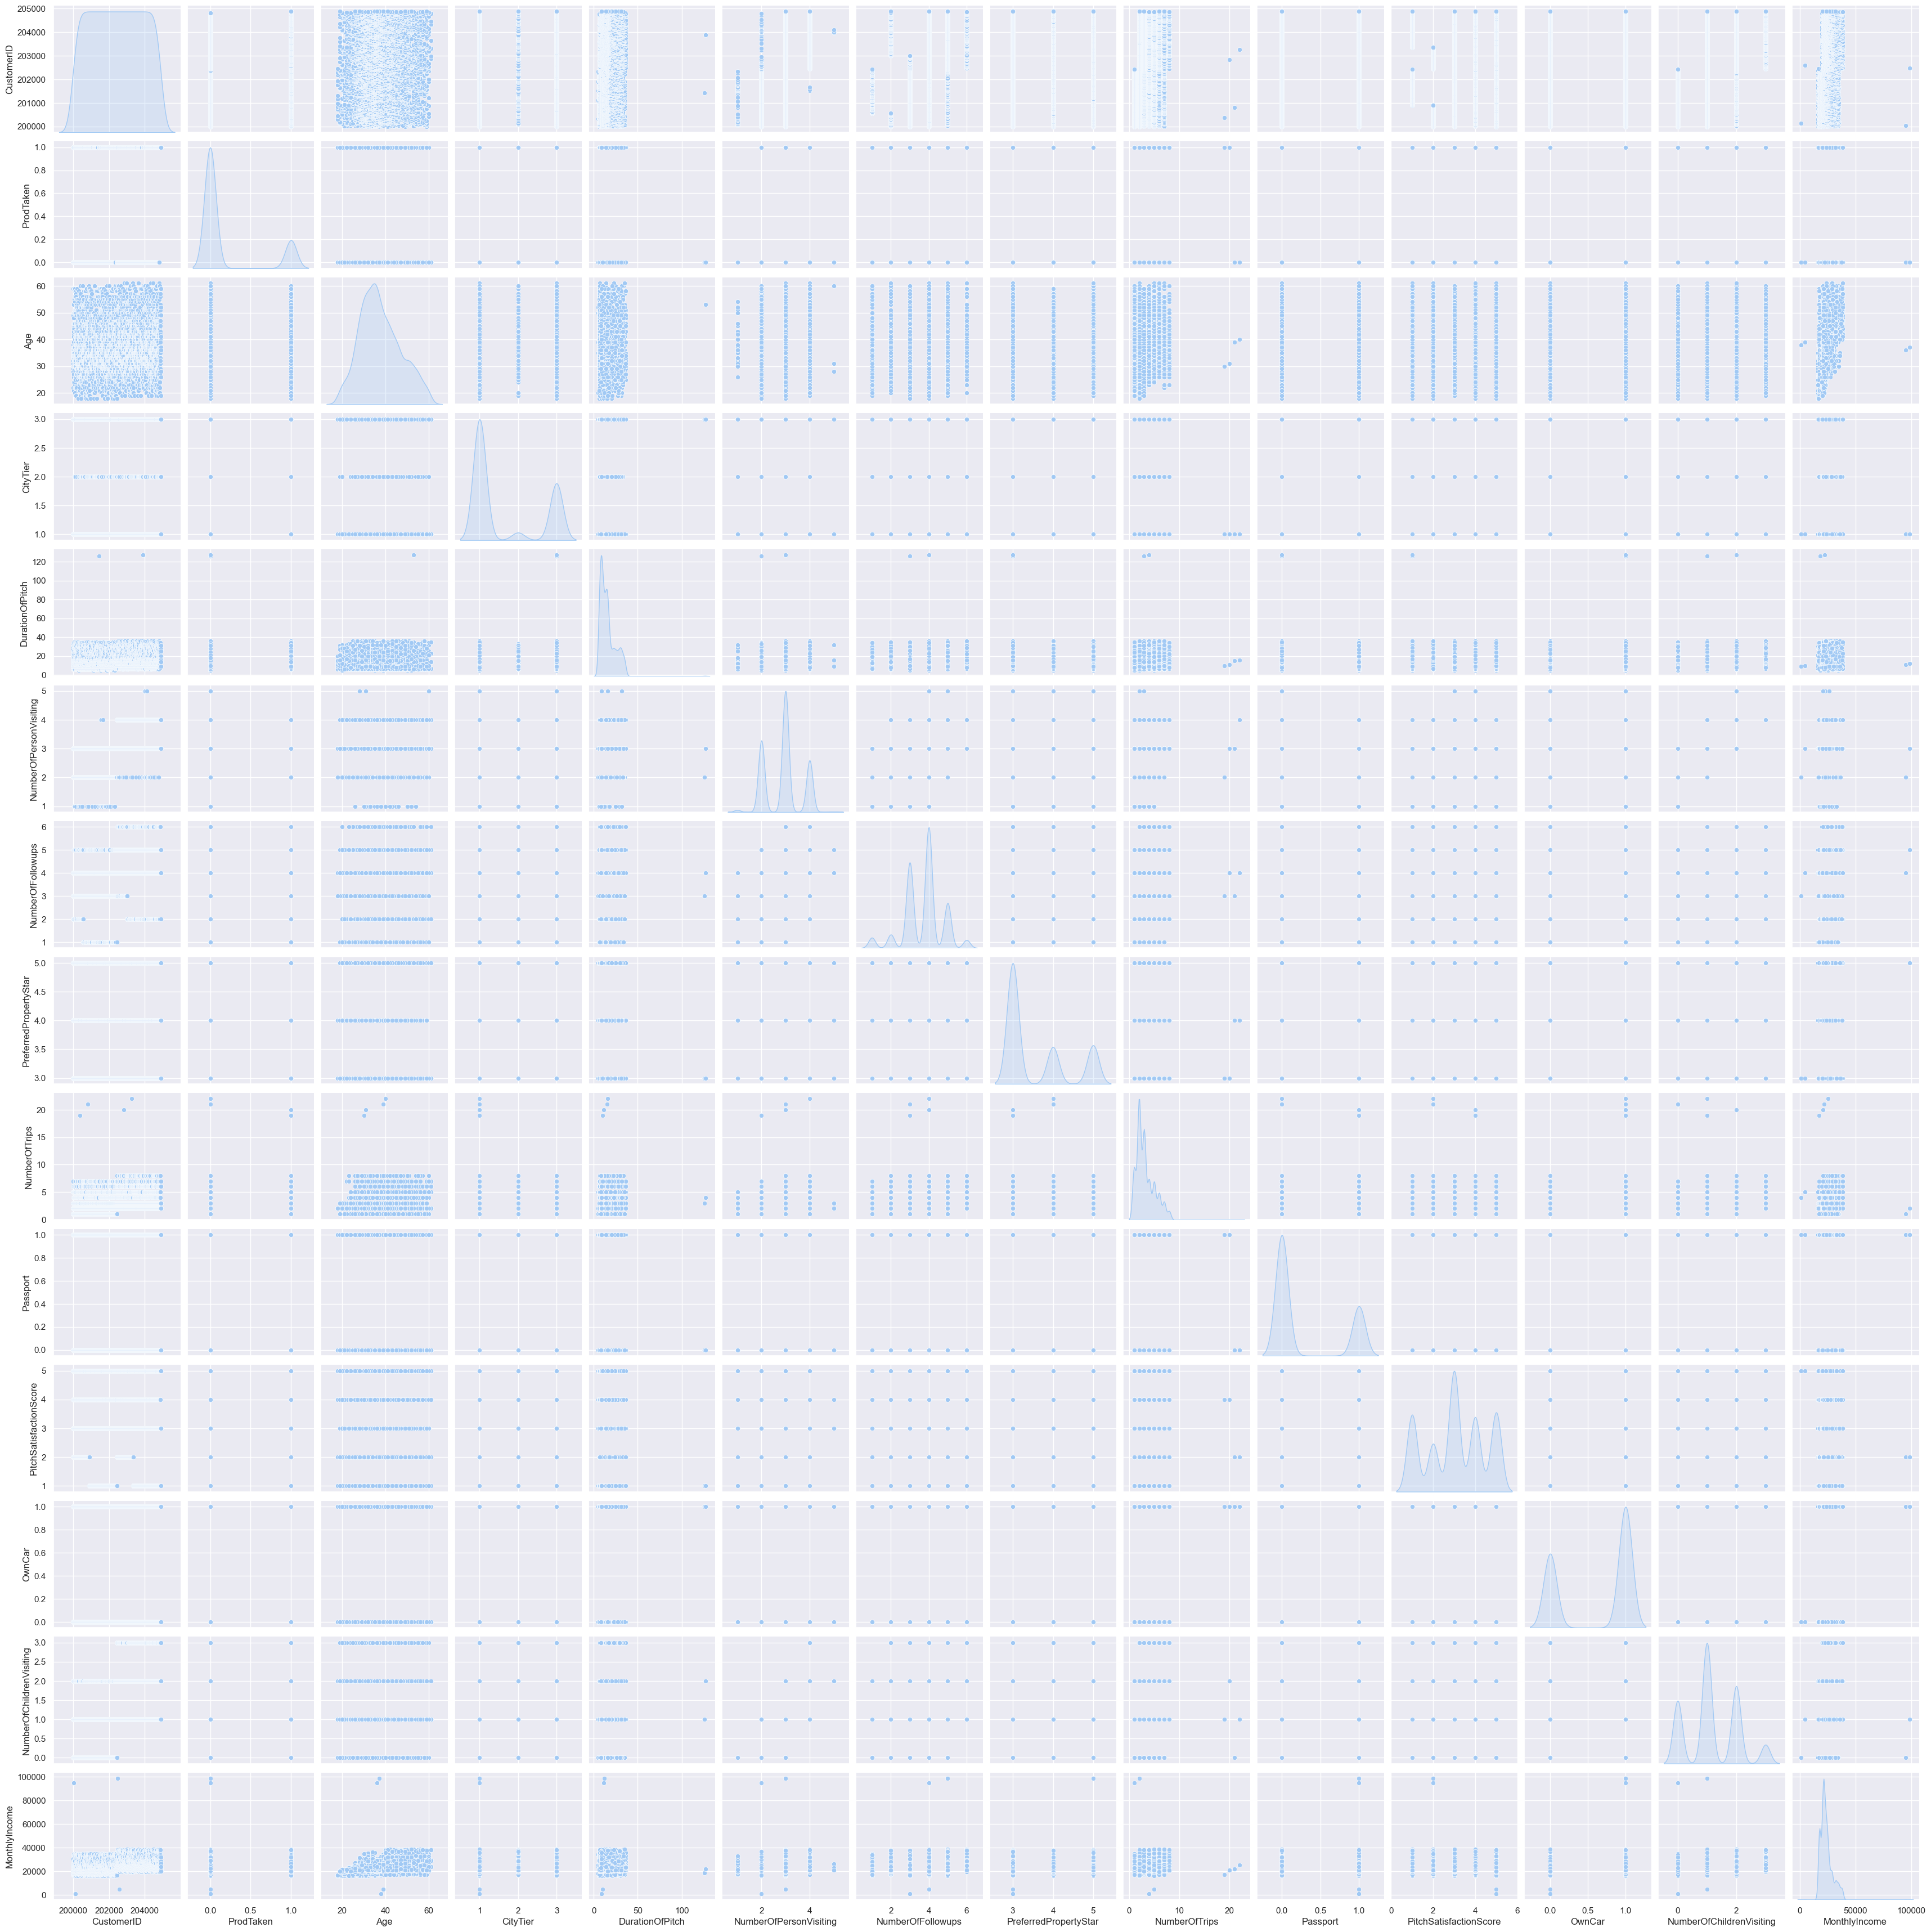

In [51]:
plt.figure(figsize=(20, 20))
sns.pairplot(df, diag_kind='kde')

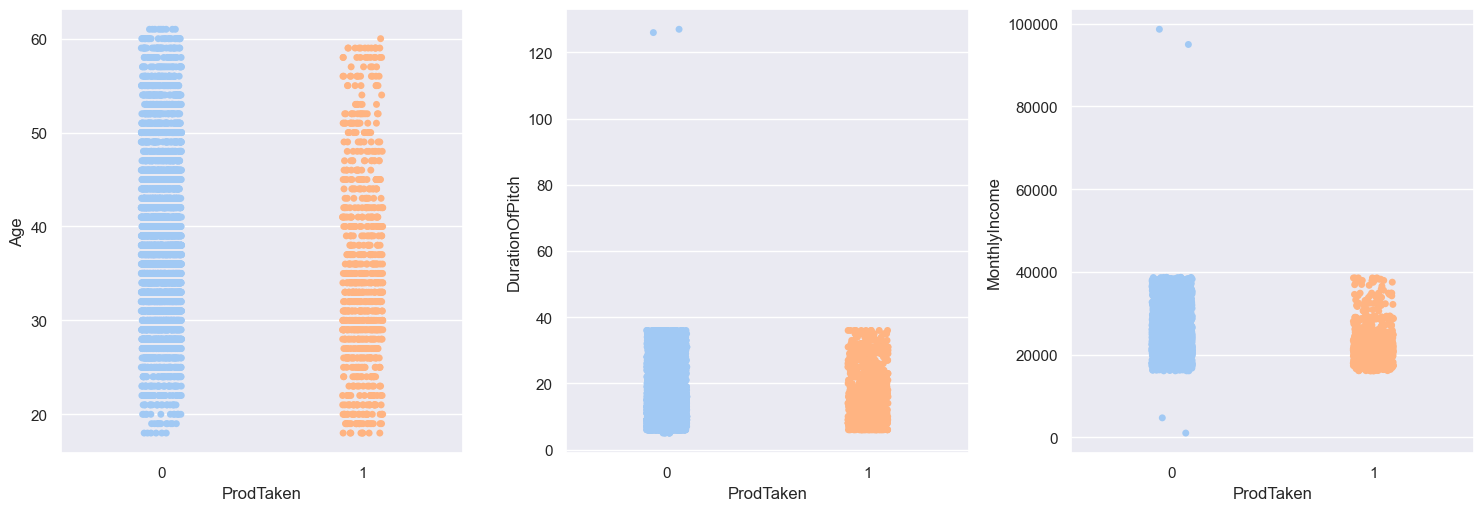

In [52]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='ProdTaken', y=num[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

**HASIL OBSERVASI**

- Dapat dilihat nilai korelasi pada variable target kita yaitu `ProdTaken`, terdapat korelasi positif walaupun lemah antara variable `Passport` terhadap `ProdTaken` yang berarti semakin tinggi nilai passport customer (1), maka semakin tinggi pula nilai ProdTaken nya atau customer yang memiliki passport lebih cenderung membeli tawaran paket dibandingkan dengan customer yang tidak memiliki passport.

- Terdapat korelasi negatif antara variable `Age` terhadap `ProdTaken` dan variable `MonthlyIncome` terhadap `ProdTaken`, yang berarti semakin kecil nilai Age/MonthlyIncome-nya maka semakin besar nilai ProdTaken-nya atau customer yang berumur kecil/muda lebih cenderung membeli tawaran paket liburan dibandingkan dengan customer yang berumur tua, dan customer yang bergaji kecil cenderung membeli tawaran paket liburan dibandingkan dengan customer yang bergaji besar.

- Terdapat 2 fitur yang memiliki korelasi yang cukup kuat, yaitu `NumberOfPersonVisiting` dan `NumberOfChildrenVisiting`. dimana membentuk positif korelasi. Sehingga pada proses feature selection, kita dapat mengeliminasi fitur yang redundan(mempunyai informasi serupa) agar tidak terjadi overfitting pada model machine learning nantinya.

## **4. Business Insight**

### **1. Apakah kepemilikan Passport mempengaruhi keputusan pelanggan untuk membeli tawaran paket liburan?**

In [53]:
import matplotlib.style as style
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [54]:
df_passport = df.groupby(['Passport','ProdTaken']).agg({'CustomerID' : ['nunique']}).reset_index()
df_passport.columns = ['Passport','ProdTaken','Total Customer']
df_passport

,Passport,ProdTaken,Total Customer
0,0,0,3040
1,0,1,426
2,1,0,928
3,1,1,494


In [55]:
#menjumlahkan total customer per Passport
df_passport1 = df_passport.groupby('Passport').agg({'Total Customer' : ['sum']}).reset_index()
df_passport1.columns = ['Passport','Total Customer per Passport']

#merge df yg tadi ke df yang lama
df_merge = df_passport.merge(df_passport1, on='Passport')

#membuat column baru yang berisikan persentase
df_merge['Percentage'] = round((df_merge['Total Customer'] / df_merge['Total Customer per Passport']) * 100,2)
df_merge

,Passport,ProdTaken,Total Customer,Total Customer per Passport,Percentage
0,0,0,3040,3466,87.71
1,0,1,426,3466,12.29
2,1,0,928,1422,65.26
3,1,1,494,1422,34.74


Text(0.8, 958, '928')

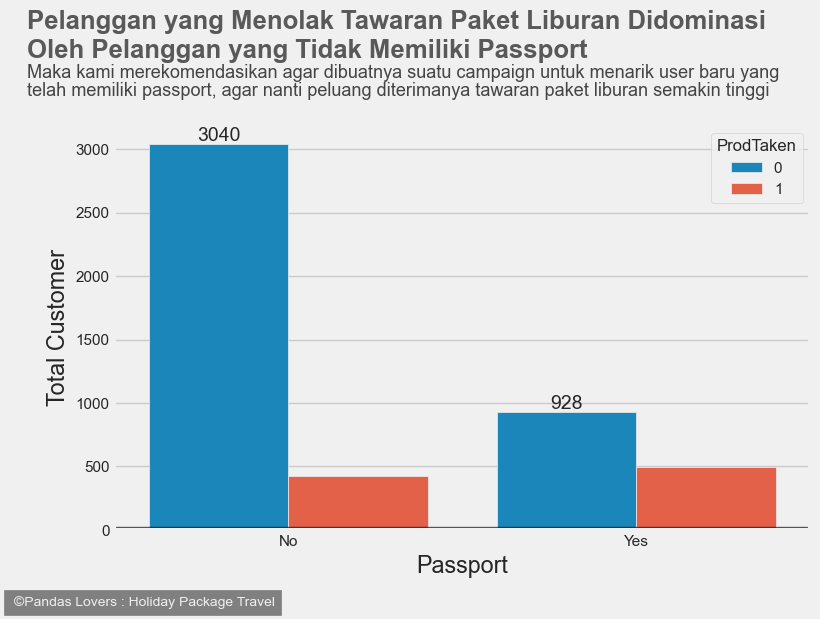

In [56]:
#membuat grafik
style.use('fivethirtyeight')

plt.figure(figsize=(8,5))

sns.barplot(x='Passport',y='Total Customer',data=df_merge,hue='ProdTaken')

plt.text(x = 0-0.75, y = 3950,
          s = 'Pelanggan yang Menolak Tawaran Paket Liburan Didominasi', 
          fontsize = 18.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-0.75, y = 3725,
          s = 'Oleh Pelanggan yang Tidak Memiliki Passport', 
          fontsize = 18.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-0.75, y = 3560,
         s = 'Maka kami merekomendasikan agar dibuatnya suatu campaign untuk menarik user baru yang', 
         fontsize = 13, alpha = .85)
plt.text(x = 0-0.75, y = 3420,
         s = 'telah memiliki passport, agar nanti peluang diterimanya tawaran paket liburan semakin tinggi', 
         fontsize = 13, alpha = .85)
plt.text(x = -0.80, y = -600,
    s = ' ©Pandas Lovers : Holiday Package Travel',fontsize = 10, 
               color = '#f0f0f0', backgroundcolor = 'grey')

plt.axhline(y = 0, color = 'black', linewidth = 5.3, alpha = .7)


plt.xticks(ticks=[0,1], labels=['No','Yes'])


plt.text(x = 0-0.20, y = 3040+30, s = "3040", ha='center')
plt.text(x = 1-0.20, y = 928+30, s = "928", ha='center')

### **2. Apakah umur mempengaruhi keputusan pelanggan untuk membeli tawaran paket liburan atau tidak?**

Text(-0.8, -0.008, ' ©Pandas Lovers : Holiday Package Travel')

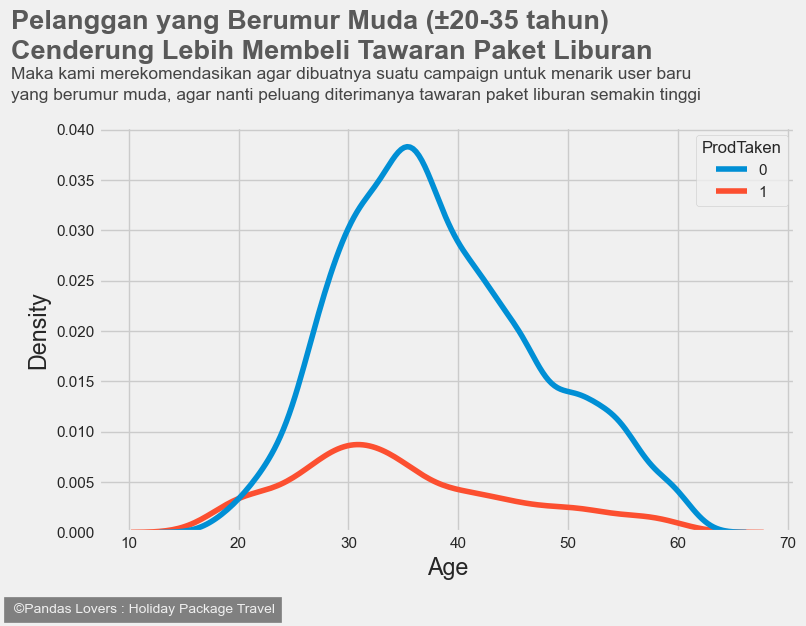

In [57]:
plt.figure(figsize=(8,5))
sns.kdeplot(x='Age', data=df, hue='ProdTaken')

plt.text(x = 0-0.75, y = 0.050,
          s = 'Pelanggan yang Berumur Muda (±20-35 tahun)', 
          fontsize = 19.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-0.75, y = 0.047,
          s = 'Cenderung Lebih Membeli Tawaran Paket Liburan', 
          fontsize = 19.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-0.75, y = 0.045,
         s = 'Maka kami merekomendasikan agar dibuatnya suatu campaign untuk menarik user baru', 
         fontsize = 12.5, alpha = .85)
plt.text(x = 0-0.75, y = 0.043,
         s = 'yang berumur muda, agar nanti peluang diterimanya tawaran paket liburan semakin tinggi', 
         fontsize = 12.5, alpha = .85)
plt.text(x = -0.80, y = -0.008,
    s = ' ©Pandas Lovers : Holiday Package Travel',fontsize = 10, 
               color = '#f0f0f0', backgroundcolor = 'grey')

### **3. Apakah gaji mempengaruhi keputusan pelanggan untuk membeli tawaran paket liburan atau tidak?**

Text(-16000, -2e-05, ' ©Pandas Lovers : Holiday Package Travel')

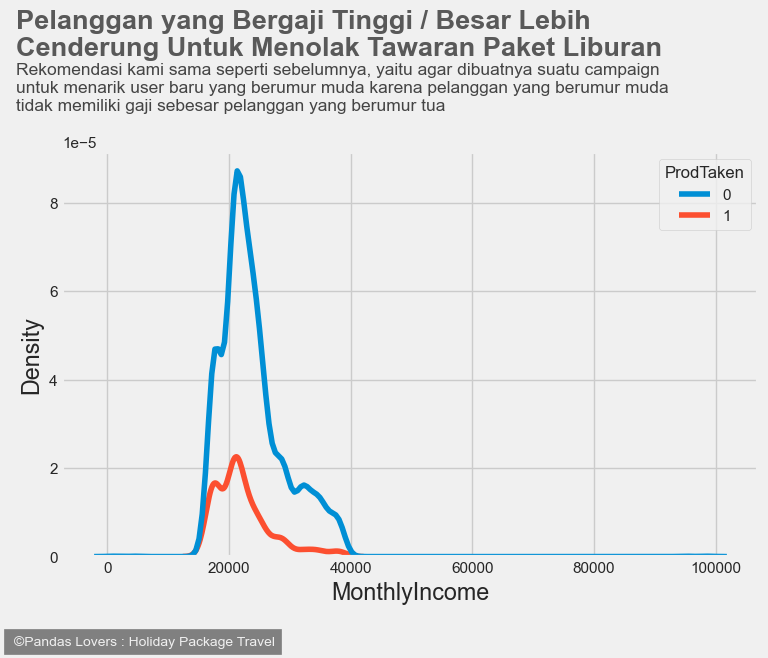

In [58]:
plt.figure(figsize=(8,5))
sns.kdeplot(x='MonthlyIncome', data=df, hue='ProdTaken')
plt.text(x = 0-15000, y = 0.0001195,
          s = 'Pelanggan yang Bergaji Tinggi / Besar Lebih', 
          fontsize = 19.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-15000, y = 0.0001135,
          s = 'Cenderung Untuk Menolak Tawaran Paket Liburan', 
          fontsize = 19.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-15000, y = 0.000109,
         s = 'Rekomendasi kami sama seperti sebelumnya, yaitu agar dibuatnya suatu campaign', 
         fontsize = 12.5, alpha = .85)
plt.text(x = 0-15000, y = 0.000105,
         s = 'untuk menarik user baru yang berumur muda karena pelanggan yang berumur muda', 
         fontsize = 12.5, alpha = .85)
plt.text(x = 0-15000, y = 0.000101,
         s = 'tidak memiliki gaji sebesar pelanggan yang berumur tua', 
         fontsize = 12.5, alpha = .85)
plt.text(x = -16000, y = -0.00002,
    s = ' ©Pandas Lovers : Holiday Package Travel',fontsize = 10, 
               color = '#f0f0f0', backgroundcolor = 'grey')

# **DATA PRE-PROCESSING**

In [381]:
#Code
df = pd.read_csv(r"C:\Users\jodhi\Documents\RAKAMIN ACADEMY\FINAL PROJECT\DATASET\Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

## Handling Missing Value

In [383]:
# Drop missing value
df.dropna(subset=['TypeofContact','NumberOfChildrenVisiting','PreferredPropertyStar','NumberOfTrips'], inplace=True)

In [384]:
# Imputasi Missing value dengan Mode, Median & Mean
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(), inplace=True)
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0], inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)

In [385]:
# Cek Kembali Missing Value
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

## Handling Invalid Data Types
- Terdapat kolom dengan tipe data yang kurang sesuai, yaitu kolom `NumberOfChildrenVisiting`, `NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips` & `Age` yang bertipe data float sehingga nantinya harus kita rubah menjadi tipe data integer.

In [386]:
subset = ['NumberOfChildrenVisiting','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','Age']
df[subset] = df[subset].astype(dtype='int64')

In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4631 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4631 non-null   int64  
 1   ProdTaken                 4631 non-null   int64  
 2   Age                       4631 non-null   int64  
 3   TypeofContact             4631 non-null   object 
 4   CityTier                  4631 non-null   int64  
 5   DurationOfPitch           4631 non-null   float64
 6   Occupation                4631 non-null   object 
 7   Gender                    4631 non-null   object 
 8   NumberOfPersonVisiting    4631 non-null   int64  
 9   NumberOfFollowups         4631 non-null   int64  
 10  ProductPitched            4631 non-null   object 
 11  PreferredPropertyStar     4631 non-null   int64  
 12  MaritalStatus             4631 non-null   object 
 13  NumberOfTrips             4631 non-null   int64  
 14  Passport

## Handling Duplicated Data

In [388]:
print('Banyak data dan kolom : ',df.shape)
print('Jumlah ID Customer duplikat : ',df['CustomerID'].duplicated().sum())
print('Jumlah data duplikat',df.duplicated().sum())

Banyak data dan kolom :  (4631, 20)
Jumlah ID Customer duplikat :  0
Jumlah data duplikat 0


Tidak Ada Data duplicated

## Handling Invalid Value

In [389]:
print("Value Count Gender Sebelum Diubah : ")
print(df['Gender'].value_counts())

df['Gender'] = df['Gender'].replace('Fe Male', 'Female')

print("\n\nValue Count Gender Sebelum Diubah : ")
print(df['Gender'].value_counts())

Value Count Gender Sebelum Diubah : 
Male       2765
Female     1711
Fe Male     155
Name: Gender, dtype: int64


Value Count Gender Sebelum Diubah : 
Male      2765
Female    1866
Name: Gender, dtype: int64


In [390]:
#Ubah value Unmarried & Divorced menjadi Single
print("Value Count Gender Sebelum Diubah : ")
print(df['MaritalStatus'].value_counts())


df['MaritalStatus'] = df['MaritalStatus'].replace('Unmarried','Single')
df['Gender'].value_counts()

print("Value Count Gender Sebelum Diubah : ")
print(df['MaritalStatus'].value_counts())

Value Count Gender Sebelum Diubah : 
Married      2204
Divorced      886
Single        859
Unmarried     682
Name: MaritalStatus, dtype: int64
Value Count Gender Sebelum Diubah : 
Married     2204
Single      1541
Divorced     886
Name: MaritalStatus, dtype: int64


## **Train / Test Split**

In [391]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=24)

In [392]:
print(df_train.shape)
df_train.head(3)

(3704, 20)


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4130,204130,1,31,Company Invited,3,33.0,Small Business,Female,3,5,Deluxe,5,Single,7,0,1,1,2,Manager,25374.0
2699,202699,0,26,Self Enquiry,1,7.0,Salaried,Female,4,4,Deluxe,3,Divorced,2,0,3,1,2,Manager,23576.0
3152,203152,0,37,Company Invited,3,15.0,Large Business,Male,3,4,Deluxe,3,Married,6,0,3,1,1,Manager,23757.0


In [393]:
print(df_test.shape)
df_test.head(3)

(927, 20)


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
105,200105,0,59,Company Invited,2,8.0,Salaried,Female,2,4,King,3,Divorced,1,0,2,1,1,VP,33844.0
2188,202188,0,37,Company Invited,1,29.0,Salaried,Male,2,3,Deluxe,5,Married,2,1,1,1,0,Manager,18633.0
1502,201502,0,30,Self Enquiry,1,15.0,Small Business,Male,2,4,Basic,3,Single,2,0,4,0,1,Executive,17206.0


## Handle Outliers

dimensi data sebelum remove outlier :  (3704, 20)


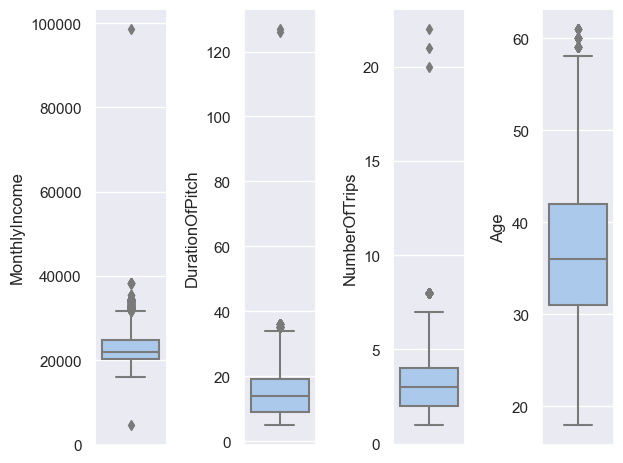

In [394]:
print("dimensi data sebelum remove outlier : ", df_train.shape)
subset = ['MonthlyIncome','DurationOfPitch','NumberOfTrips','Age']
sns.set_theme(style="darkgrid", palette="pastel")
for i in range( len(subset)):
    plt.subplot(1,4, i+1)
    sns.boxplot(data=df_train, y=df_train[subset[i]])
plt.tight_layout()

### 1. Metode IQR 
- untuk ['MonthlyIncome','DurationOfPitch','NumberOfTrips'], karena distribusi skewed

In [395]:
subset = ['MonthlyIncome','DurationOfPitch','NumberOfTrips']
for i in subset:
    Q1 = df_train[i].quantile(0.25)
    Q3 = df_train[i].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (1.5*IQR)
    high_limit = Q3 + (1.5*IQR)
    df_train = df_train[ (df_train[i]>low_limit) & (df_train[i]<high_limit) ]
print(df_train.shape)

(3116, 20)


### 2. Metode Z_Score 
- untuk ['Age'] karena distribusi normal

In [396]:
from scipy import stats
z_score = np.abs(stats.zscore(df_train['Age']))
df_train= df_train[z_score<2]
print(df_train.shape)

(2951, 20)


**Visualisasi Setelah Remove Outlier**

dimensi data sebelum remove outlier :  (2951, 20)


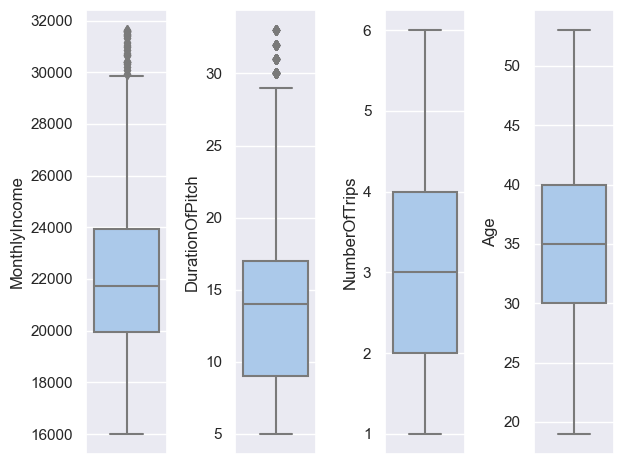

In [397]:
print("dimensi data sebelum remove outlier : ", df_train.shape)
subset = ['MonthlyIncome','DurationOfPitch','NumberOfTrips','Age']
for i in range( len(subset)):
    plt.subplot(1,4, i+1)
    sns.boxplot(data=df_train, y=df_train[subset[i]])
plt.tight_layout()

## Feature Transformation

In [398]:
#OPSI
numeric = ['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

for i in numeric:
    normalization = mms.fit(df_train[[i]])
    df_train[i] = normalization.transform(df_train[[i]])
    df_test[i] = normalization.transform(df_test[[i]])

In [399]:
#OPSI 2, Jika ingin memakai KNN
# numeric = ['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()

# for i in numeric:
#     scaler = ss.fit(df_train[[i]])
#     df_train[i] = scaler.transform(df_train[[i]])
#     df_test[i] = scaler.transform(df_test[[i]])


## Feature Endcoding

In [400]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

categorical = ['TypeofContact','Gender','ProductPitched','MaritalStatus','Designation']
for i in categorical:
    df_train[i+"_Endcode"] = LE.fit_transform(df_train[[i]])
    df_test[i+"_Endcode"]  = LE.transform(df_test[[i]])

In [401]:
df['Occupation'].value_counts()

Salaried          2237
Small Business    1967
Large Business     425
Free Lancer          2
Name: Occupation, dtype: int64

In [402]:
def product(x):
    if x['Occupation'] == 'Salaried':
        product = 0
    if x['Occupation'] == 'Small Business':
        product = 1
    if x['Occupation'] == 'Large Business':
        product = 2
    if x['Occupation'] == 'Free Lancer':
        product = 3
    return product
df_train['Occupation_Endcode'] = df_train.apply(lambda x: product(x), axis=1)
df_test['Occupation_Endcode'] = df_test.apply(lambda x: product(x), axis=1)

**CHECK VALUE LABELENDCODING**
- Check apakah setiap kategori memiliki nilai endcoding yang konsisten

In [403]:
categorical = ['TypeofContact','Gender','ProductPitched','MaritalStatus','Designation','Occupation']
for i in categorical:
    print(df_train[[i,i+"_Endcode"]].groupby([i,i+"_Endcode"]).nunique())

Empty DataFrame
Columns: []
Index: [(Company Invited, 0), (Self Enquiry, 1)]
Empty DataFrame
Columns: []
Index: [(Female, 0), (Male, 1)]
Empty DataFrame
Columns: []
Index: [(Basic, 0), (Deluxe, 1), (King, 2), (Standard, 3), (Super Deluxe, 4)]
Empty DataFrame
Columns: []
Index: [(Divorced, 0), (Married, 1), (Single, 2)]
Empty DataFrame
Columns: []
Index: [(AVP, 0), (Executive, 1), (Manager, 2), (Senior Manager, 3), (VP, 4)]
Empty DataFrame
Columns: []
Index: [(Large Business, 2), (Salaried, 0), (Small Business, 1)]


In [404]:
for i in categorical:
    print(df_test[[i,i+"_Endcode"]].groupby([i,i+"_Endcode"]).nunique())

Empty DataFrame
Columns: []
Index: [(Company Invited, 0), (Self Enquiry, 1)]
Empty DataFrame
Columns: []
Index: [(Female, 0), (Male, 1)]
Empty DataFrame
Columns: []
Index: [(Basic, 0), (Deluxe, 1), (King, 2), (Standard, 3), (Super Deluxe, 4)]
Empty DataFrame
Columns: []
Index: [(Divorced, 0), (Married, 1), (Single, 2)]
Empty DataFrame
Columns: []
Index: [(AVP, 0), (Executive, 1), (Manager, 2), (Senior Manager, 3), (VP, 4)]
Empty DataFrame
Columns: []
Index: [(Free Lancer, 3), (Large Business, 2), (Salaried, 0), (Small Business, 1)]


In [405]:
df_train.sample(3)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TypeofContact_Endcode,Gender_Endcode,ProductPitched_Endcode,MaritalStatus_Endcode,Designation_Endcode,Occupation_Endcode
4122,204122,0,0.647059,Company Invited,1,0.392857,Salaried,Male,4,5,...,0,2,Manager,0.483096,0,1,1,1,2,0
3465,203465,1,0.205882,Self Enquiry,3,0.392857,Salaried,Male,4,5,...,1,1,Executive,0.452619,1,1,0,0,1,0
4764,204764,0,0.411765,Company Invited,3,0.142857,Salaried,Female,4,4,...,1,1,Executive,0.351902,0,0,0,1,1,0


In [406]:
df_test.sample(3)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TypeofContact_Endcode,Gender_Endcode,ProductPitched_Endcode,MaritalStatus_Endcode,Designation_Endcode,Occupation_Endcode
2624,202624,0,0.382353,Self Enquiry,1,0.500000,Small Business,Female,4,4,...,1,3,Executive,0.422461,1,0,0,0,1,1
3597,203597,1,0.000000,Company Invited,3,0.178571,Small Business,Female,4,4,...,0,2,Executive,0.271354,0,0,0,2,1,1
3713,203713,0,0.735294,Self Enquiry,2,0.142857,Salaried,Male,4,4,...,0,1,Executive,0.397490,1,1,0,2,1,0


## Feature Selection

In [407]:
X_train = df_train.drop(['ProdTaken','CustomerID','TypeofContact','Gender','ProductPitched','MaritalStatus','Designation','Occupation'],axis=1)
y_train = df_train[['ProdTaken']]

X_test = df_test.drop(['ProdTaken','CustomerID','TypeofContact','Gender','ProductPitched','MaritalStatus','Designation','Occupation'],axis=1)
y_test = df_test[['ProdTaken']]

In [408]:
from sklearn.feature_selection import SelectKBest, chi2

feature_selector = SelectKBest(score_func=chi2, k=6)
x_new_feature = feature_selector.fit_transform(X_train,y_train)
feature_indices = feature_selector.get_support(indices=True)
selected_features = X_train.columns[feature_indices]
print(selected_features)

Index(['NumberOfFollowups', 'Passport', 'ProductPitched_Endcode',
       'MaritalStatus_Endcode', 'Designation_Endcode', 'Occupation_Endcode'],
      dtype='object')


<AxesSubplot:>

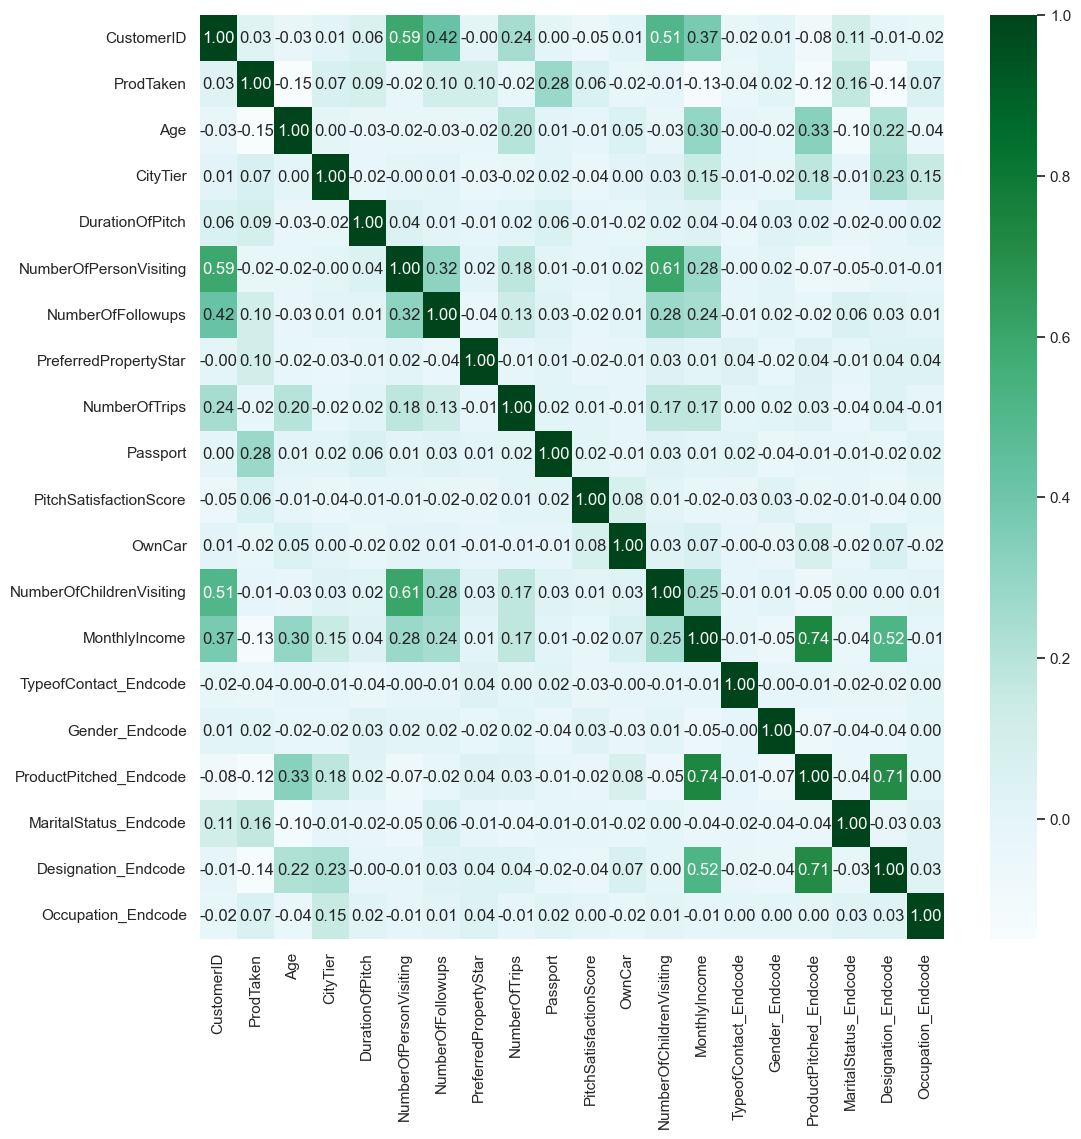

In [409]:
plt.figure(figsize=(12,12))
sns.heatmap(df_train.corr(), fmt='.2f', annot=True, cmap='BuGn')

In [410]:
best_feature = ['Passport','MaritalStatus_Endcode','NumberOfFollowups','Designation_Endcode','Occupation_Endcode']
X_train = X_train[best_feature]
y_train = y_train[['ProdTaken']]

X_test = X_test[best_feature]
y_test = y_test[['ProdTaken']]

In [422]:
train_preprocessed = pd.concat([X_train,y_train], axis=1)
test_preprocessed = pd.concat([X_test,y_test], axis=1)

print(train_preprocessed.shape)
print(test_preprocessed.shape)

df_preprocessed = pd.concat([train_preprocessed,test_preprocessed])
X_preprocessed = df_preprocessed.drop(columns='ProdTaken')
y_preprocessed = df_preprocessed[['ProdTaken']]
print(df_preprocessed.shape)

(2951, 6)
(927, 6)
(3878, 6)


In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(train_preprocessed.corr(), fmt='.2f', annot=True, cmap='BuGn')

# **MODELLING**

In [329]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X=X_train, y=y_train)

LogisticRegression()

In [435]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    score = cross_validate(RandomForestClassifier(), X_preprocessed, y_preprocessed, cv=5, scoring='roc_auc', return_train_score=True)
    eval_metrix=pd.DataFrame({  'Matrics':["Accuracy","Recal","Precision","F1-Score","Roc_auc","Roc_auc (crossval test)"],
                              
                                'y_train_pred':[accuracy_score(y_train_pred,y_train),
                                                recall_score(y_train_pred,y_train),
                                                precision_score(y_train_pred,y_train),
                                                f1_score(y_train_pred,y_train),
                                                roc_auc_score(y_train, y_pred_proba_train[:, 1]),
                                                score['train_score'].mean()],
                                                
                                'y_test_pred':[ accuracy_score(y_test_pred,y_test),
                                                recall_score(y_test_pred,y_test),
                                                precision_score(y_test_pred,y_test),
                                                f1_score(y_test_pred,y_test),
                                                roc_auc_score(y_test, y_pred_proba_test[:, 1]),
                                                score['test_score'].mean()]
                                  
                })
    return eval_metrix

In [436]:
eval(LR)

,Matrics,y_train_pred,y_test_pred
0,Accuracy,0.827177,0.824164
1,Recal,0.657303,0.625000
2,Precision,0.206714,0.223464
3,F1-Score,0.314516,0.329218
4,Roc_auc,0.748771,0.732180
5,Roc_auc (crossval test),0.846941,0.755121
